# Dissatisfaction Data Analysis_3

Analyze the topic of dissatisfaction of each group.

In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
import numpy.linalg as LA
import random as r
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
import itertools
from tqdm import tqdm_notebook as tqdm

data = pd.read_csv('gender_data_12.csv', encoding="utf-8")

Since what we are interested in is the stationary mechanism of posting, we analyzed data from when the service was stable.

In [2]:
num = sum(data["created_at_unix"]<400)
data = data[num:].reset_index(drop=True)
data["created_at_unix"] = data["created_at_unix"]-400
data.head()

Unnamed: 0  post_id  user_id category    sub_category  company  \
0       16298  3842076     8104    Â§ñÈ£ü„ÉªÂ∫óËàó           „É¨„Çπ„Éà„É©„É≥  „É≠„Ç§„É§„É´„Éõ„Çπ„Éà   
1       16299  3842199     7618    Ê•≠Áïå„ÉªÊ•≠Á®Æ             ÈÅãËº∏Ê•≠   ÂçÉËëâÈÅãËº∏ÊîØÂ±Ä   
2       16300  3842225   104953  ÊöÆ„Çâ„Åó„Éª‰Ωè„Åæ„ÅÑ  „Ç≠„ÉÉ„ÉÅ„É≥Áî®ÂìÅ„ÉªÈ£üÂô®„ÉªË™øÁêÜÂô®ÂÖ∑      NaN   
3       16301  3842337   118578     ‰∫∫ÈñìÈñ¢‰øÇ              ËÅ∑Â†¥      NaN   
4       16302  3842545   128998    ÂåªÁôÇ„ÉªÁ¶èÁ•â              ÁóÖÈô¢   È´òÁ†ÇÂ∏ÇÊ∞ëÁóÖÈô¢   

        branch   product                                               text  \
0      Ê®™È†àË≥ÄÂ∏Ç‰ΩêÂéüÂ∫ó    Â∏≠„ÅÆÊ°àÂÜÖÂü∫Ê∫ñ  Âπ≥Êó•„É©„É≥„ÉÅ„Çø„Ç§„É†„ÅÆÂà©Áî®ÂÆ¢„Åå„ÄÅÊØéÂõû90%‰ª•‰∏ä‰∏≠È´òÂπ¥Â•≥ÊÄß„Å™„ÅÆ„Åß„ÄÅÂ∏≠„ÅÆÈÅ∏Êäû„ÅåÂèØËÉΩ„Å™ÊôÇ„ÅØ„ÄÅÁî∑ÊÄßÂÆ¢„Å´ÈÅ∏...   
1  ËªΩËá™ÂãïËªäÂïè„ÅÑÂêà„Çè„ÅõÁ™ìÂè£  ÊãÖÂΩìËÄÖ„ÅÆÈõªË©±ÂØæÂøú  Èªí„Éä„É≥„Éê„Éº„ÅÆËªä„ÅÆÂªÉËªä„Å´Èñ¢„Åô„ÇãÂïè„ÅÑÂêà„Çè„Åõ„Å´Áî∑ÊÄß„ÅÆËÅ∑Âì°„ÅåÂá∫„Åü„Åå„ÄÅÂè£Ë™ø„Åå‰∏ä„Åã„Çâ„Å™ÊÑü„Åò„ÅßÊ®™ÊüÑ„Å™ÊÖãÂ∫¶„Çí...   
2          NaN        „ÅäÁÆ∏  Â•≥ÊÄßÁî®„ÅÆ„ÅäÁÆ∏„ÅØ„Å©„ÅÜ„Åó„Å¶Áî∑ÊÄß„ÇÇ„ÅÆ„Çà„ÇäÁü≠„ÅèÂá∫Êù•„Å¶„Çã„Çì„Åß„Åô„Åã„ÅÅ?\nÁßÅ„ÅØÁ¥∞„Åè„Å¶Áî∑ÊÄß„ÇÇ„ÅÆ„Åê„Çâ„ÅÑ„ÅÆÈï∑„Åï...   
3          NaN   ËÅ∑Â†¥„ÅÆ‰∫∫ÈñìÈñ¢‰øÇ  ËÅ∑Â†¥„ÅÆÁî∑ÊÄß„ÄÅËã•„ÅÑÂ•≥ÊÄß„Å´„Å∞„Åã„ÇäÂÑ™„Åó„ÅèËá™ÂàÜ„Å´„ÅØÂÜ∑„Åü„ÅÑ„ÄÇ\nË©±„ÇÇ„Ç¢„Éã„É°„ÇÑ„Ç≤„Éº„É†Â•Ω„Åç„ÅßÂêà„Çè„Å™„ÅÑ„ÅÆ„ÇÇ„ÅÇ„Çã„Åå„ÄÇ   
4          NaN    Áî∑ÊÄßÁúãË≠∑Â∏´?  ÁúãË≠∑Â∏´„Åã„ÅØ„ÄÅ„ÅØ„Å£„Åç„Çä„Åó„Å™„ÅÑ„ÅåÁî∑ÊÄß„Çπ„Çø„ÉÉ„Éï„ÅåÂ¢ó„Åà„Å¶„ÅÑ„Çã„ÄÇÂ•≥ÊÄß„ÅØÈ´™„Çí„Åæ„Å®„ÇÅ„Å¶„ÅÑ„Çã„ÅåÁî∑ÊÄß„ÅØ„Éú„Çµ„Éú„Çµ...   

                   created_at  created_at_unix gender   birth  label  
0  2016-04-21 14:01:30.472191         0.017917      Áî∑  1963.0     11  
1  2016-04-21 14:18:54.013804         0.030000      Â•≥  1986.0      3  
2  2016-04-21 14:22:22.307534         0.032407      Â•≥  1963.0      5  
3  2016-04-21 14:39:22.150780         0.044213      Â•≥  1981.0      3  
4  2016-04-21 15:10:58.489131         0.066157      Â•≥  1971.0      4

## LDA
1. $N$ : Number of words. Poisson distribution with intensity $\xi$.
2. $\Theta$ : Distribution of Topic. Dirichelt distribution with parameter $\alpha$.
3. Each word $w_1, \dots, w_N$ is generated as below:  
a) $z_n$ : Topic of the n-th word, which is generated by Multinomial distribution with parameter $\Theta$.  
b) $w_n$ : The n-th word which is generated some probability $p(w_n|Z_n, \beta)$ where $\beta$ is parameter.

In [3]:
import MeCab
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, CoherenceModel
from collections import defaultdict

# MeCab„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„ÅÆÁîüÊàê
mecab = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd -Owakati")

# „Éá„Éº„Çø„ÅÆÊ∫ñÂÇô
textDeta = data["text"].tolist()

# Èô§Â§ñ„Åô„ÇãÂçòË™û
stopwords=["‰∏çÊ∫Ä", "Áî∑", "Â•≥", "Áî∑ÊÄß", "Â•≥ÊÄß", "Áî∑Â≠ê", "Â•≥Â≠ê", "Áî∑„ÅÆÂ≠ê", "Â•≥„ÅÆÂ≠ê", "Áî∑Â•≥", "„ÅÆ", "„Çà„ÅÜ", "„Åì„Å®", "„Çì", "„ÇÇ„ÅÆ", "„Åï„Çì", "„Åù„ÅÜ", "„Åü„ÇÅ", "„Åî„Çç", "„Åø„Åü„ÅÑ", "„Åù„Çå", "‰∫ã", "ÁöÑ", "Êñπ", "‰Ωï", "‰∏≠", "‰∫∫", "ÁßÅ"]

texts = []
for line in textDeta:
    text = []
    node = mecab.parseToNode(line.strip())
    while node:
        fields = node.feature.split(",")
        if fields[0] == 'ÂêçË©û' and not fields[6] in stopwords:
            text.append(node.surface)
        node = node.next
    texts.append(text)
    
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=2) # Âá∫ÁèæÊñáÊõ∏Êï∞/ÂÖ®ÊñáÊõ∏Êï∞„Åå 0.5 ‰ª•‰∏ã
corpus = [dictionary.doc2bow(text) for text in texts]
print('vocab size: ', len(dictionary))

vocab size:  8418


In [4]:
for word, id_ in dictionary.token2id.items():
    print(f"id: {id_}, ÂçòË™û: {word}, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: {dictionary.dfs[id_]}, Âá∫ÁèæÂõûÊï∞: {dictionary.cfs[id_]}")

id: 0, ÂçòË™û: 90%, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 1, ÂçòË™û: „É©„É≥„ÉÅ„Çø„Ç§„É†, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 2, ÂçòË™û: ‰∏≠È´òÂπ¥, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 11, Âá∫ÁèæÂõûÊï∞: 12
id: 3, ÂçòË™û: ‰ª•‰∏ä, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 129, Âá∫ÁèæÂõûÊï∞: 142
id: 4, ÂçòË™û: Âà©Áî®ÂÆ¢, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 5, Âá∫ÁèæÂõûÊï∞: 6
id: 5, ÂçòË™û: ÂèØËÉΩ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 18, Âá∫ÁèæÂõûÊï∞: 18
id: 6, ÂçòË™û: Â•≥ÊÄßÂÆ¢, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 38, Âá∫ÁèæÂõûÊï∞: 40
id: 7, ÂçòË™û: Â∏≠, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 122, Âá∫ÁèæÂõûÊï∞: 169
id: 8, ÂçòË™û: Âπ≥Êó•, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 23, Âá∫ÁèæÂõûÊï∞: 26
id: 9, ÂçòË™û: ÊôÇ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 490, Âá∫ÁèæÂõûÊï∞: 569
id: 10, ÂçòË™û: ÊØéÂõû, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 57, Âá∫ÁèæÂõûÊï∞: 64
id: 11, ÂçòË™û: Áî∑ÊÄßÂÆ¢, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 51, Âá∫ÁèæÂõûÊï∞: 57
id: 12, ÂçòË™û: Áúü„Çì‰∏≠, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 13, Âá∫ÁèæÂõûÊï∞: 14
id: 13, ÂçòË™û: ÈÅ∏Êäû, Âá∫Áèæ

id: 1467, ÂçòË™û: 7, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 14, Âá∫ÁèæÂõûÊï∞: 15
id: 1468, ÂçòË™û: „Ç≥„Éº„Éä„Éº, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 68, Âá∫ÁèæÂõûÊï∞: 93
id: 1469, ÂçòË™û: „Çª„Éº„É´, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 13, Âá∫ÁèæÂõûÊï∞: 16
id: 1470, ÂçòË™û: „Éô„Éì„Éº, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 17, Âá∫ÁèæÂõûÊï∞: 18
id: 1471, ÂçòË™û: Â£≤Â†¥, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 5, Âá∫ÁèæÂõûÊï∞: 6
id: 1472, ÂçòË™û: ÁúãÊùø, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 7, Âá∫ÁèæÂõûÊï∞: 11
id: 1473, ÂçòË™û: „Ç®„Ç¢„Ç≥„É≥, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 18, Âá∫ÁèæÂõûÊï∞: 19
id: 1474, ÂçòË™û: ‰ΩìÊÑüÊ∏©Â∫¶, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 8, Âá∫ÁèæÂõûÊï∞: 8
id: 1475, ÂçòË™û: Â•≥ÊÄßÈô£, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 13, Âá∫ÁèæÂõûÊï∞: 15
id: 1476, ÂçòË™û: Êó•Èñì, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 1477, ÂçòË™û: ÊØéÊó•, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 65, Âá∫ÁèæÂõûÊï∞: 72
id: 1478, ÂçòË™û: Ê∞óÂÄô, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 1479, ÂçòË™û: 5ÂàÜ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 14, Âá∫ÁèæÂõûÊï∞: 14
i

id: 2966, ÂçòË™û: „Åõ„Åæ„ÅÑ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 2967, ÂçòË™û: „Åù„Å£„Å°, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 10, Âá∫ÁèæÂõûÊï∞: 10
id: 2968, ÂçòË™û: Áæ©ÁêÜ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 5, Âá∫ÁèæÂõûÊï∞: 6
id: 2969, ÂçòË™û: ÂêπÁü≥‰∏ÄÊÅµ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 2970, ÂçòË™û: Â•≥ÊÄß„Éï„Ç°„É≥, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 7, Âá∫ÁèæÂõûÊï∞: 8
id: 2971, ÂçòË™û: ÊîØÊåÅ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 8, Âá∫ÁèæÂõûÊï∞: 8
id: 2972, ÂçòË™û: Èâ¢Âêà„Çè„Åõ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 2973, ÂçòË™û: 25, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 4, Âá∫ÁèæÂõûÊï∞: 5
id: 2974, ÂçòË™û: H, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 2975, ÂçòË™û: „ÅÇ„ÅØ„ÅØ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 2976, ÂçòË™û: „É™„Çµ„Ç§„ÇØ„É´, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 4, Âá∫ÁèæÂõûÊï∞: 5
id: 2977, ÂçòË™û: ‰ª∂, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 37, Âá∫ÁèæÂõûÊï∞: 40
id: 2978, ÂçòË™û: ÂÖ®ÂõΩ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 16, Âá∫ÁèæÂõûÊï∞: 16
id: 2

id: 4466, ÂçòË™û: ÊñπÂêë, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 16, Âá∫ÁèæÂõûÊï∞: 17
id: 4467, ÂçòË™û: Ëá™ÊÑèË≠òÈÅéÂâ∞, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 5, Âá∫ÁèæÂõûÊï∞: 5
id: 4468, ÂçòË™û: ÈÖåÈáè, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 4469, ÂçòË™û: „Éú„ÇØ„Çµ„Éº, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 3
id: 4470, ÂçòË™û: „Éè„É≠„Ç¶„Ç£„É≥, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 7, Âá∫ÁèæÂõûÊï∞: 7
id: 4471, ÂçòË™û: Âæ©Ê¥ª, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 8, Âá∫ÁèæÂõûÊï∞: 8
id: 4472, ÂçòË™û: ÊúüÈñìÈôêÂÆö, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 3
id: 4473, ÂçòË™û: „É¨„Ç∑„Éº„Éà, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 4, Âá∫ÁèæÂõûÊï∞: 4
id: 4474, ÂçòË™û: ‰∏Ä„Å§‰∏Ä„Å§, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 4475, ÂçòË™û: ÊÆ∫Âà∞, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 6, Âá∫ÁèæÂõûÊï∞: 6
id: 4476, ÂçòË™û: Êú´„Å£Â≠ê, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 3, Âá∫ÁèæÂõûÊï∞: 3
id: 4477, ÂçòË™û: Ê§úË®º, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 6, Âá∫ÁèæÂõûÊï∞: 8
id: 4478, ÂçòË™û: Êú¨Ê•≠, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 3, Âá∫ÁèæÂ

id: 5965, ÂçòË™û: ÈÄ±ÂàäË™å, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 5, Âá∫ÁèæÂõûÊï∞: 5
id: 5966, ÂçòË™û: ‰∏ÄËà¨ËÅ∑, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 3, Âá∫ÁèæÂõûÊï∞: 5
id: 5967, ÂçòË™û: ÂÆüÁèæ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 5, Âá∫ÁèæÂõûÊï∞: 5
id: 5968, ÂçòË™û: Áî∑Â•≥ÂÖ±ÂêåÂèÇÁîªÁ§æ‰ºö, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 5969, ÂçòË™û: „Éê„É™„Ç´„É≥, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 4
id: 5970, ÂçòË™û: „Ç∑„Éß„Éº„ÉÑ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 4, Âá∫ÁèæÂõûÊï∞: 4
id: 5971, ÂçòË™û: ËÖπÂ∑ª„Åç, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 3
id: 5972, ÂçòË™û: ÊÇ≤ÊÉ®, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 5, Âá∫ÁèæÂõûÊï∞: 5
id: 5973, ÂçòË™û: Áî∑ÊÄß‰øùËÇ≤Â£´, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 35, Âá∫ÁèæÂõûÊï∞: 46
id: 5974, ÂçòË™û: „Éç„ÉÉ„ÇØ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 5
id: 5975, ÂçòË™û: ÂÜçËÄÉ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 5976, ÂçòË™û: „Ç¥„É™Êäº„Åó, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 3, Âá∫ÁèæÂõûÊï∞: 3
id: 5977, ÂçòË™û: ‰ºäÈáéÂ∞æÊÖß, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥

id: 7465, ÂçòË™û: „Éë„É≥„ÇØ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 7466, ÂçòË™û: Êó•ÊõúÂ§ßÂ∑•, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 3, Âá∫ÁèæÂõûÊï∞: 3
id: 7467, ÂçòË™û: Êà¶Èöä„ÇÇ„ÅÆ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 7468, ÂçòË™û: „Ç§„É≥„ÉÜ„Ç∞„É¨„Éº„Éà, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 7469, ÂçòË™û: Âè£Á¥Ö, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 4, Âá∫ÁèæÂõûÊï∞: 5
id: 7470, ÂçòË™û: Ê∞óÂêà, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 7471, ÂçòË™û: Ë≥áÁîüÂ†Ç, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 4, Âá∫ÁèæÂõûÊï∞: 5
id: 7472, ÂçòË™û: „Ç∑„Éä„É™„Ç™, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 4, Âá∫ÁèæÂõûÊï∞: 4
id: 7473, ÂçòË™û: ËÅ∑Âãô, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 3, Âá∫ÁèæÂõûÊï∞: 4
id: 7474, ÂçòË™û: ÂæóÊÑèÂàÜÈáé, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 7475, ÂçòË™û: ÈÅ©ÊùêÈÅ©ÊâÄ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 7476, ÂçòË™û: „Çä„Åó, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 2, Âá∫ÁèæÂõûÊï∞: 2
id: 7477, ÂçòË™û: „Çπ„ÉÜ, Âá∫Áèæ„Éâ„Ç≠„É•„É°„É≥„ÉàÊï∞: 3, Âá∫

### Comparison of Perplexity and Coherence.

$Perplexity = \exp\Bigg(-\frac{1}{N}\sum_{n=1}^N \log_2 p(w_n)\Bigg)$, where $N$ is vocab size and $p(w_n)$ is probability of word $w_i$. Low value is good.

Coherence : The average of word-to-word similarity for each topic. High value is good.

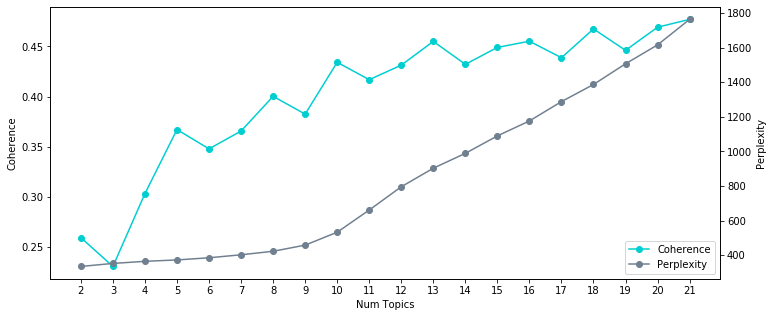

In [5]:
#Metrics for Topic Models
start = 2
limit = 22
step = 1

coherence_vals = []
perplexity_vals = []

for n_topic in tqdm(range(start, limit, step)):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topic, random_state=1)
    perplexity_vals.append(np.exp2(-lda_model.log_perplexity(corpus)))
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_vals.append(coherence_model_lda.get_coherence())

# evaluation
x = range(start, limit, step)
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot()

# coherence
ax1.plot(x, coherence_vals, 'o-', color='darkturquoise', label='Coherence')
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('Coherence')

# perplexity
ax2 = ax1.twinx()
ax2.plot(x, perplexity_vals, 'o-', color='slategray', label='Perplexity')
ax2.set_ylabel('Perplexity')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right')

# Vis
ax1.set_xticks(x)
plt.show()

In [6]:
# „Éà„Éî„ÉÉ„ÇØÊï∞„ÅÆË®≠ÂÆö
NUM_TOPICS = 8

# „É¢„Éá„É´‰ΩúÊàê
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=NUM_TOPICS, random_state=1)

# „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÁµêÊûú„ÇíÂá∫Âäõ
index = [663, 4242, 4969, 6311, 6634, 6890, 7808, 7961]
for i in index:
    print(textDeta[i], end='\n')
    score_by_topic = np.zeros(NUM_TOPICS)
    for topic, score in lda_model[corpus[i]]:
        score_by_topic[int(topic)] = float(score)
    for n in range(NUM_TOPICS-1):
        print('{:.2f}'.format(score_by_topic[n]), end=', ')
    print('{:.2f}'.format(score_by_topic[NUM_TOPICS-1]), end="\n\n")

Ëá™ÂàÜ„Å´„ÅØÁîò„ÅÑ„ÅåÁõ∏Êâã„ÅÆ„Åì„Å®„Å´„Å™„Çã„Å®Áõ∏Êâã„ÇíË≤∂„ÇÅ„Çã„Åü„ÇÅ„Å†„Åë„Å´Áî∑Â∞äÂ•≥Âçë„Å®„ÅãÂ∑ÆÂà•„Å®„ÅãËªΩ„ÄÖ„Åó„Åè‰Ωø„ÅÜ„ÅÆ„ÇÑ„ÇÅ„Å¶„Åª„Åó„ÅÑ„ÄÇ„Ç≥„É°„É≥„ÉÜ„Éº„Çø„Éº„É¨„Éô„É´„ÅÆË≠∞Âì°„ÅØÁâπ„Å´Á®éÈáë„ÅÆÁÑ°ÈßÑ„Å™„Çì„Åß„ÇÑ„ÇÅ„Å¶„Åª„Åó„ÅÑ„ÄÇ
0.01, 0.01, 0.01, 0.01, 0.92, 0.01, 0.01, 0.01

„ÉÜ„É¨„Éì„Åß„ÅÆ„Ç™„Éç„Çß„Ç≠„É£„É©„Å∏„ÅÆ„ÅÑ„Åò„Çä„ÇÑÊµÅË°å„ÇäÁâ©„ÅÆ„Çà„ÅÜ„Å´Áî∑Ë£ÖÂ•≥Ë£Ö„ÇíÂèñ„Çä‰∏ä„Åí„ÇãÈôê„ÇäÊó•Êú¨„ÅÆ„Çª„ÇØ„Ç∑„É£„É´„Éû„Ç§„Éé„É™„ÉÜ„Ç£„Å´ÂØæ„Åô„ÇãÁêÜËß£„ÅØÂ∫É„Åæ„Çã„Å©„Åì„Çç„ÅãÈñìÈÅï„Å£„ÅüÊñπÂêë„Å´Ë°å„Åè„ÅÆ„Åß„ÅØ„Å™„ÅÑ„Åã„Å™„Å®‰∏çÂÆâ„ÄÇÊúçË£Ö„ÄÅ‰Ωì„ÄÅÂøÉ„ÄÅÊÄßÂØæË±°„ÇíÁî∑ÊÄß„ÅãÂ•≥ÊÄß„Åã„ÅÆ‰∫åÁ®ÆÈ°û„ÅÆ„Å©„Å°„Çâ„Åã„Å´Áµ±‰∏Ä„Åô„Çã„ÇÇ„ÅÆ„Å†„Å®„ÅÑ„ÅÜËÄÉ„Åà„ÅØÈñìÈÅï„Åà„Å¶„ÅÑ„Çã„ÄÇ„Åæ„Åö„ÅØ„É°„Éá„Ç£„Ç¢„Åå„Åç„Å°„Çì„Å®„Åó„ÅüÁü•Ë≠ò„Çí„Å§„Åë„Å¶Ê¨≤„Åó„ÅÑ
0.00, 0.30, 0.00, 0.00, 0.00, 0.20, 0.00, 0.47

Â§ñÂõΩ‰∫∫ÈÅ∏Êâã„Å∏„ÅÆ„Ç§„É≥„Çø„Éì„É•„Éº„ÇíÂêπ„ÅçÊõø„Åà„Åô„ÇãÊôÇ„Å´„ÄÅÂ•≥ÊÄßÈÅ∏Êâã„ÅÆË®ÄËëâ„ÅÆË™ûÂ∞æ„Çí„Äå„Äú„Çè„Çà„Äç„Äå„Äú„ÅÆ„Çà„Äç„Äå„Äú„Çè„Äç„ÄÅÁî∑ÊÄßÈÅ∏Êâã„ÅÆË®ÄËëâ„ÅÆË™ûÂ∞æ„Çí„Äå„Äú„Å™„Ç

### Words that belong to each topic with high probability

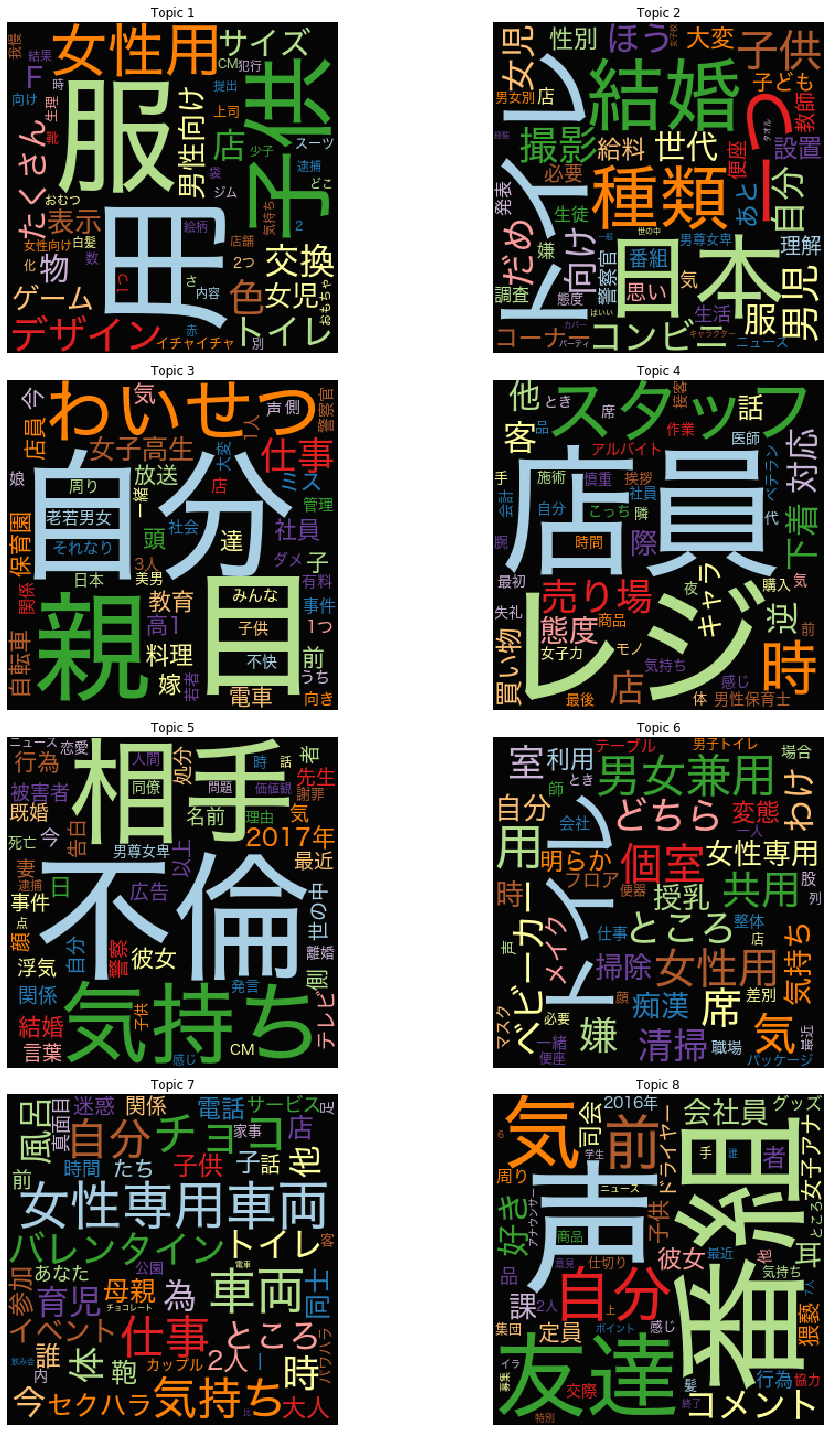

In [7]:
import math
from wordcloud import WordCloud

# WordCloud
fig, axs = plt.subplots(ncols=2, nrows=math.ceil(lda_model.num_topics/2), figsize=(16,20))
axs = axs.flatten()

for i in range(lda_model.num_topics):
    x = dict(lda_model.show_topic(i, 50))
    im = WordCloud(
        background_color='black',
        font_path="/system/Library/Fonts/„Éí„É©„ÇÆ„ÉéËßí„Ç¥„Ç∑„ÉÉ„ÇØ W4.ttc",
        width=300, height=300,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(i+1))

# vis
plt.tight_layout()
plt.show()

In [8]:
import math
from wordcloud import WordCloud
from googletrans import Translator

# Translator
translator = Translator()

for i in range(lda_model.num_topics):
    print("Topic " + str(i+1) + " :")
    x = dict(lda_model.show_topic(i, 50))
    keys = [k for k, v in x.items()]
    cnt = 0
    while cnt < 10:
        trans_en = translator.translate(keys[cnt])
        print(str(cnt+1) + ":" + trans_en.text, keys[cnt])
        cnt+=1
    print()

Topic 1 :
1:use Áî®
2:clothes Êúç
3:children Â≠ê‰æõ
4:For women Â•≥ÊÄßÁî®
5:design „Éá„Ç∂„Ç§„É≥
6:color Ëâ≤
7:Exchange ‰∫§Êèõ
8:shop Â∫ó
9:toilet „Éà„Ç§„É¨
10:Stuff Áâ©

Topic 2 :
1:toilet „Éà„Ç§„É¨
2:Japan Êó•Êú¨
3:marry ÁµêÂ©ö
4:type Á®ÆÈ°û
5:One ‰∏Ä„Å§
6:children Â≠ê‰æõ
7:Boy Áî∑ÂÖê
8:photograph ÊíÆÂΩ±
9:convenience store „Ç≥„É≥„Éì„Éã
10:For Âêë„Åë

Topic 3 :
1:myself Ëá™ÂàÜ
2:Eye ÁõÆ
3:Dear Ë¶™
4:Obscene „Çè„ÅÑ„Åõ„Å§
5:jobs ‰ªï‰∫ã
6:high school girl Â•≥Â≠êÈ´òÁîü
7:cuisine ÊñôÁêÜ
8:head È†≠
9:child Â≠ê
10:now ‰ªä

Topic 4 :
1:Clerk Â∫óÂì°
2:cash register „É¨„Ç∏
3:staff „Çπ„Çø„ÉÉ„Éï
4:Time ÊôÇ
5:Sales floor Â£≤„ÇäÂ†¥
6:shop Â∫ó
7:customer ÂÆ¢
8:underwear ‰∏ãÁùÄ
9:Reverse ÈÄÜ
10:Correspondence ÂØæÂøú

Topic 5 :
1:Cheating ‰∏çÂÄ´
2:Opponent Áõ∏Êâã
3:Feelings Ê∞óÊåÅ„Å°
4:2017 2017Âπ¥
5:marry ÁµêÂ©ö
6:behavior Ë°åÁÇ∫
7:Girlfriend ÂΩºÂ•≥
8:day Êó•
9:~ side ÂÅ¥
10:now ‰ªä

Topic 6 :
1:toilet „Éà„Ç§„É¨
2:use Áî®
3:unisex Áî∑Â•≥ÂÖºÁî®
4:Qi Ê∞ó
5:Private room ÂÄãÂÆ§
6:For women Â•≥ÊÄßÁî®
7:se

In [9]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

# Vis PCoA
vis_pcoa = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
vis_pcoa

/opt/anaconda3/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.215725 -0.039553       1        1  11.145069
1      0.080273 -0.095114       2        1   9.407043
2     -0.048545  0.041602       3        1  12.051202
3     -0.059928  0.193273       4        1  14.601503
4     -0.144778 -0.162481       5        1  14.846544
5      0.077708  0.031143       6        1  13.391569
6     -0.003293  0.065631       7        1  12.907942
7     -0.117162 -0.034500       8        1  11.649127, topic_info=     Category         Freq Term        Total  loglift  logprob
89    Default  1031.000000  „Éà„Ç§„É¨  1031.000000  30.0000  30.0000
161   Default   523.000000   „É¨„Ç∏   523.000000  29.0000  29.0000
80    Default   659.000000    Áî®   659.000000  28.0000  28.0000
164   Default   682.000000   Â∫óÂì°   682.000000  27.0000  27.0000
256   Default   453.000000    Êúç   453.000000  26.0000  26.0000
...       ...          ...  ...          ...      ...      ...
1512   Topic8    45.951382   Ë°åÁÇ∫   236.519150   0.5115  -5.6019
145    Topic8    45.200275    ‰ªñ   314.499847   0.2101  -5.6184
174    Topic8    46.593105   Â≠ê‰æõ   469.517181  -0.1603  -5.5881
384    Topic8    42.811623   2‰∫∫   215.201721   0.5352  -5.6727
838    Topic8    42.902611   ÊúÄËøë   248.382568   0.3939  -5.6706

[565 rows x 6 columns], token_table=      Topic      Freq Term
term                      
4161      3  0.935970   0Ê≠≥
6046      4  0.978393  17Ê≠≥
440       1  0.345110   1„Å§
440       2  0.064708   1„Å§
440       3  0.359489   1„Å§
...     ...       ...  ...
48        1  0.172094    È´™
48        4  0.031290    È´™
48        6  0.140804    È´™
48        8  0.641440    È´™
7412      5  0.957667   È¨ºÁïú

[1625 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])